In [4]:
# Import pandas for data manipulation
import pandas as pd

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules from scikit-learn for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
# Load the dataset using pandas with the correct encoding
df = pd.read_csv(r'./laptop_price.csv', encoding='ISO-8859-1')


In [6]:
# Display the first few rows of the dataframe to understand its structure
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)


Missing Values in each column:
 laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [ ]:
# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)


In [8]:
# Remove 'GB' from 'Ram' column and convert to integer
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Convert 'Inches' column to float
df['Inches'] = df['Inches'].astype(float)

# Remove 'kg' from 'Weight' column and convert to float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [26]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'./laptop_price.csv', encoding='ISO-8859-1')

# Clean the column names
df.columns = df.columns.str.strip()

# Function to calculate Z-scores and identify outliers
def remove_outliers(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

# Columns to check for outliers
columns_to_check = ['Price_euros', 'Inches']

# Remove outliers from the dataset
cleaned_df = remove_outliers(df, columns_to_check)

# Print the cleaned dataset
print("Cleaned dataset:")
print(cleaned_df)

# Optionally, save the cleaned dataset to a new CSV file
cleaned_df.to_csv(r'./cleaned_laptop_price.csv', index=False, encoding='ISO-8859-1')

# Display the shape of the original and cleaned dataframes
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")


Cleaned dataset:
      laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                      

In [27]:
# Display the first few rows of the cleaned data
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


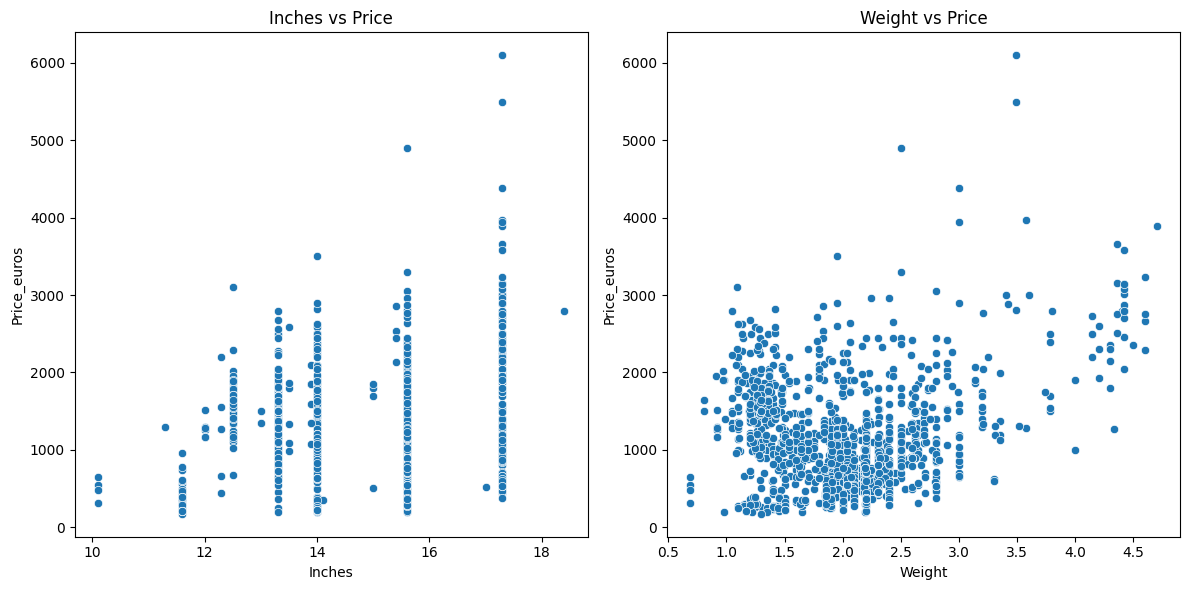

In [10]:
# Create scatter plots to visualize the relationship between features and target variable
plt.figure(figsize=(12, 6))

# Scatter plot for Inches vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Inches', y='Price_euros')
plt.title('Inches vs Price')

# Scatter plot for Weight vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Weight', y='Price_euros')
plt.title('Weight vs Price')

plt.tight_layout()
plt.show()


In [11]:
# Define features (X) and target (y)
X = df[['Inches', 'Ram', 'Weight']]
y = df['Price_euros']

# Scale the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [13]:
# Create a Linear Regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict the target variable for the test data
y_pred = lr.predict(X_test)


In [15]:
# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 353.27
Mean Squared Error: 253913.02
R^2 Score: 0.52


In [22]:
# Calculate and print the correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             laptop_ID    Inches  Price_euros
laptop_ID     1.000000 -0.087796     0.067830
Inches       -0.087796  1.000000     0.068197
Price_euros   0.067830  0.068197     1.000000


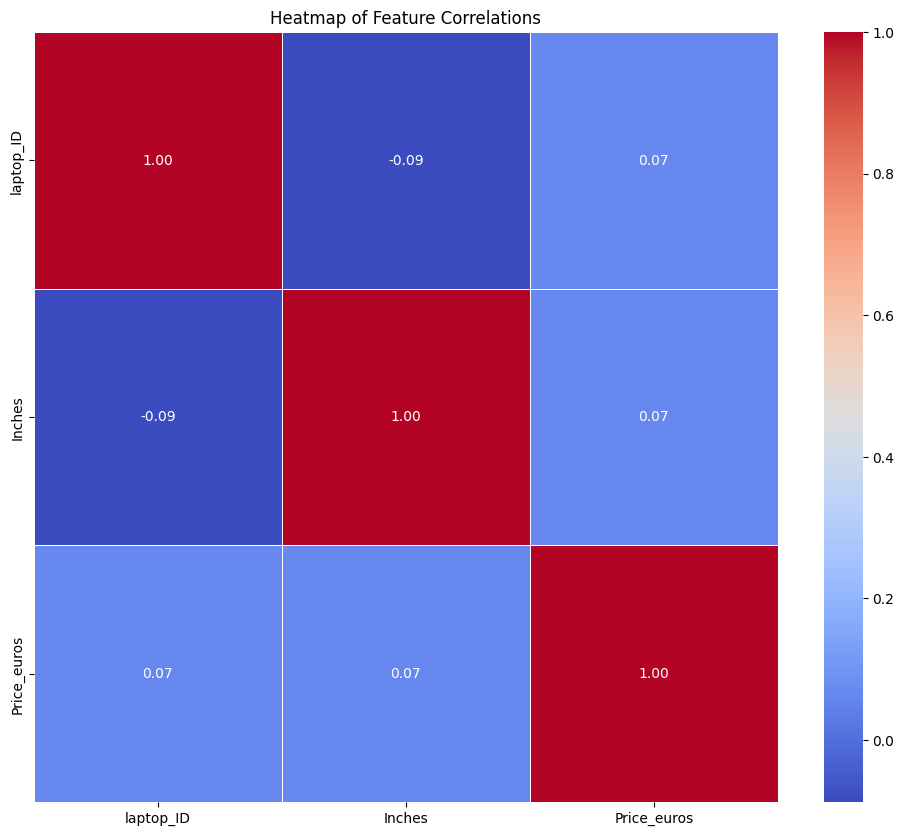

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'./laptop_price.csv', encoding='ISO-8859-1')

# Clean the column names
df.columns = df.columns.str.strip()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and show the plot
plt.title('Heatmap of Feature Correlations')
plt.show()


Correlation value: 0.97
Model intercept: -0.72


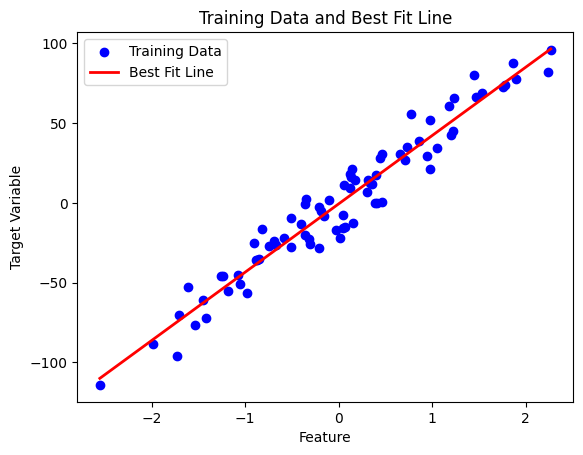

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Example data (replace with your actual data loading process)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate the correlation between the first feature and the target variable
feature_index = 0  # Adjust this index if you want to use a different feature
feature_train = X_train[:, feature_index]
correlation_value = np.corrcoef(feature_train.flatten(), y_train)[0, 1]

# Print the correlation value and the intercept of the model
print(f"Correlation value: {correlation_value:.2f}")
print(f"Model intercept: {lr.intercept_:.2f}")

# Plot training data and best fit line
plt.scatter(feature_train, y_train, color='blue', label='Training Data')

# Predict values using the trained model
sorted_indices = np.argsort(feature_train)
sorted_feature_train = feature_train[sorted_indices]
sorted_y_pred = lr.predict(sorted_feature_train.reshape(-1, 1))

# Plot the best fit line
plt.plot(sorted_feature_train, sorted_y_pred, color='red', linewidth=2, label='Best Fit Line')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Training Data and Best Fit Line')
plt.legend()

# Show the plot
plt.show()


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load and prepare your dataset
df = pd.read_csv(r'./laptop_price.csv', encoding='ISO-8859-1')
df.columns = df.columns.str.strip()

# Example preprocessing
# Convert 'Ram' from '8GB' to 8 (numerical)
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)

# Convert 'Inches' if necessary (assume it's already numerical, otherwise similar conversion)
df['Inches'] = df['Inches'].astype(float)

# Example: Handle other categorical columns if present
# Assuming 'Brand' is a categorical column
if 'Brand' in df.columns:
    label_encoder = LabelEncoder()
    df['Brand'] = label_encoder.fit_transform(df['Brand'])

# Select features and target variable
X = df[['Ram', 'Inches']]  # Example features
y = df['Price_euros']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 235012.29952455385


In [30]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [32]:
import joblib

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# New input data (replace with actual data)
new_data = pd.DataFrame({
    'Ram': [8],
    'Inches': [15.6]
})

# Make prediction
predicted_price = loaded_model.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 994.5566283424873
